# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

2023-01-02 20:12:12,033 INFO NumExpr defaulting to 4 threads.


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======


2023-01-02 20:12:12,701 INFO ====== WebDriver manager ======


[WDM] - Current google-chrome version is 108.0.5359


2023-01-02 20:12:12,886 INFO Current google-chrome version is 108.0.5359


[WDM] - Get LATEST chromedriver version for 108.0.5359 google-chrome


2023-01-02 20:12:12,889 INFO Get LATEST chromedriver version for 108.0.5359 google-chrome


[WDM] - Driver [/Users/gracecheuk/.wdm/drivers/chromedriver/mac64/108.0.5359.71/chromedriver] found in cache


2023-01-02 20:12:13,199 INFO Driver [/Users/gracecheuk/.wdm/drivers/chromedriver/mac64/108.0.5359.71/chromedriver] found in cache


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
bs = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
results = bs.find_all('table', class_='table')
results

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
headers = bs.find_all('th')
results = bs.find_all('tr', class_='data-row')

In [7]:
# Create an empty list
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

# Loop through the scraped data to create a list of rows

for header in headers:
    table_headers.append(header.text)

for r in results:
    # id
    table_id = r.find('td')
    id.append(int(table_id.text))

    # terrestrial_date
    terrestrial_date.append(table_id.find_next_sibling('td').text)
    table_id = table_id.find_next_sibling('td')
    
    # sol
    sol.append(int(table_id.find_next_sibling("td").text))
    table_id = table_id.find_next_sibling("td")
    
    # ls
    ls.append(int(table_id.find_next_sibling("td").text))
    table_id=table_id.find_next_sibling('td')
    
    # month
    month.append(int(table_id.find_next_sibling("td").text))
    table_id = table_id.find_next_sibling("td")
    
    # min_temp
    min_temp.append(float(table_id.find_next_sibling("td").text))
    table_id = table_id.find_next_sibling("td")
    
    # pressure
    pressure.append(float(table_id.find_next_sibling("td").text))

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(columns = table_headers)
df["id"] = id
df["terrestrial_date"] = terrestrial_date
df["sol"] = sol
df["ls"] = ls
df["month"] = month
df["min_temp"] = min_temp
df["pressure"] = pressure
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
# Change data types for data analysis
df = df.astype({'terrestrial_date':'datetime64'})

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months = df['month'].max()
print(f'Mars has {months} months.')

Mars has 12 months.


In [14]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].nunique()
days
print(f'There are {days} Martian days of data in this dataset.')

There are 1867 Martian days of data in this dataset.


In [15]:
# 3. What is the average low temperature by month?
avg_temp = df.groupby(['month'])['min_temp'].mean()
print(f'The average low temperature by month is: \n\
{avg_temp}.')

The average low temperature by month is: 
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64.


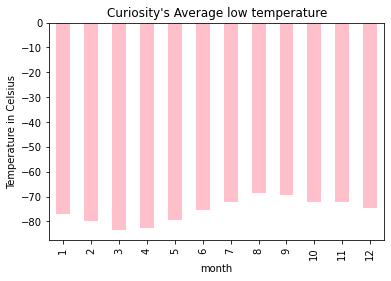

In [75]:
# Plot the average temperature by month
avg_temp.plot.bar(
    color = 'pink',
    title = "Curiosity's Average low temperature")
plt.ylabel("Temperature in Celsius")
plt.show()

Curiosity's average low temperature:
    coldest month 3 -83.30729166666667
    hottest month 8 -68.38297872340425


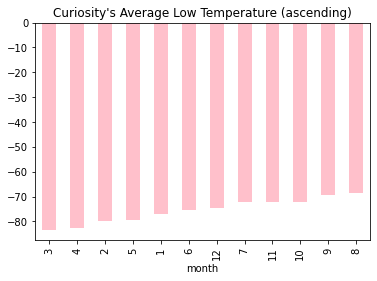

In [73]:
# Identify the coldest and hottest months in Curiosity's location
sort_avgtemp = avg_temp.sort_values(ascending = True)
sort_avgtemp.plot.bar(
    color = 'pink',
    title = "Curiosity's Average Low Temperature (ascending)"
)

coldest_temp = avg_temp.min()
hottest_temp = avg_temp.max()

print(f"Curiosity's average low temperature:\n\
    coldest month 3 {coldest_temp}\n\
    hottest month 8 {hottest_temp}")

In [57]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(['month'])['pressure'].mean()
print(f'The average pressure by Martian month is: \n\
{avg_pressure}.')

The average pressure by Martian month is: 
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64.


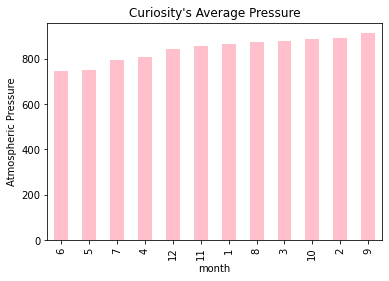

In [72]:
# Plot the average pressure by month
# sort_avgpressure = avg_pressure.sort_values(ascending = True)
avg_pressure.sort_values(ascending = True).plot.bar(
    color = 'pink',
    title = "Curiosity's Average Pressure")
plt.ylabel("Atmospheric Pressure")
plt.show()

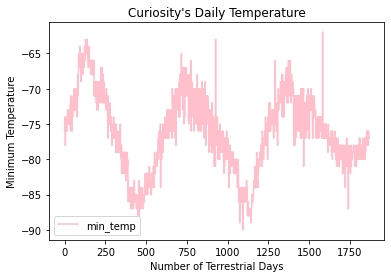

In [78]:
# 5. How many terrestrial (earth) days are there in a Martian year?
min_date = df['terrestrial_date'].min()
max_date = df['terrestrial_date'].max()
days = (max_date - min_date).days
min_temp = df[['min_temp']]

min_temp.plot(
    color = 'pink',
    title = "Curiosity's Daily Temperature")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [79]:
# Write the data to a CSV
curiosity_csv = 'Curiosity_data.csv'

df.to_csv(curiosity_csv, header = True, index = False)

In [82]:
browser.quit()

2023-01-02 21:36:22,272 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff6bf04d760>: Failed to establish a new connection: [Errno 61] Connection refused')': /session/2caf202d9711b685ee51c33e7cc88f0b
2023-01-02 21:36:22,275 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff6be1331f0>: Failed to establish a new connection: [Errno 61] Connection refused')': /session/2caf202d9711b685ee51c33e7cc88f0b
2023-01-02 21:36:22,279 WARNING Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff6be33a880>: Failed to establish a new connection: [Errno 61] Connection refused')': /session/2caf202d9711b685ee51c33e7cc8